In [416]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import ccxt
from datetime import datetime
import time
import pandas as pd
import numpy as np

In [417]:
# get all data of these pairs
def file_name(pair, freq):
    name = f"{pair.replace('/', '_')}-{freq}.json"
    return name

def convert_unix_to_datetime(x):
    return datetime.utcfromtimestamp(int(x/1000))

def read_ochlv_json(pair, freq):
    raw_data_df = pd.read_json(f"data/binance/{file_name(pair, freq)}")
    header = ['unix_time', 'open', 'high', 'low', 'close', 'volume']
    raw_data_df.columns = header
    raw_data_df['date'] = raw_data_df['unix_time'].apply(lambda x: convert_unix_to_datetime(x))
    #raw_data_df['pair'] = pair
    #raw_data_df = raw_data_df.set_index(['pair','time'])
    return raw_data_df

In [294]:
top50_pair_list = ["BTC/USDT", "ETH/USDT", "BNB/USDT", "XRP/USDT", "SOL/USDT","/USDT","LUNA/USDT","ADA/USDT","AVAX/USDT","DOGE/USDT","DOT/USDT","SHIB/USDT","NEAR/USDT","MATIC/USDT","CRO/USDT","LTC/USDT","ATOM/USDT","LINK/USDT","BCH/USDT","UNI/USDT","TRX/USDT","FTT/USDT","LEO/USDT","XLM/USDT","ETC/USDT","ALGO/USDT","XMR/USDT","MANA/USDT","VET/USDT","ICP/USDT","HBAR/USDT","FIL/USDT","EGLD/USDT","SAND/USDT","THETA/USDT","FTM/USDT","XTZ/USDT","AXS/USDT","RUNE/USDT","EOS/USDT", "AAVE/USDT", "KLAY/USDT",  "CAKE/USDT", "HNT/USDT", "ZEC/USDT", "WAVES/USDT", "FLOW/USDT", "MIOTA/USDT", "CVX/USDT", "BSV/USDT", "ENJ/USDT", "STX/USDT", "ONE/USDT", "MKR/USDT",
                   "STX/USDT", "KSM/USDT", "HT/USDT", "GALA/USDT", "LRC/USDT", "CRV/USDT"
]

In [296]:
signle_pair_df_list = []
for pair in set(top50_pair_list):
    try:
        signle_pair_df = read_ochlv_json(pair, "1h")
        signle_pair_df['pair'] = pair
        signle_pair_df_list.append(signle_pair_df)
    except:
        print(f"no {pair}")
res_df = pd.concat(signle_pair_df_list)
res_df = res_df.set_index(['pair','date'])

no /USDT
no CRO/USDT
no MIOTA/USDT
no BSV/USDT
no LEO/USDT
no HT/USDT


In [307]:
time_start = res_df.groupby('pair').min()['unix_time'].apply(lambda x: convert_unix_to_datetime(x))
clean_index = time_start[time_start<=datetime(2021,5,11)].index

res_df_clean_pair = res_df.loc[clean_index]

In [308]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint

from sklearn.decomposition import PCA

In [314]:
return_panel_data = res_df_clean_pair['close'].unstack().T

In [324]:
data=return_panel_data.copy().loc[datetime(2021,5, 11):]
datareturns = data.pct_change(1)

In [326]:
# Data Raw
data_raw = datareturns
data_raw.dropna(how='all', inplace=True)

In [327]:
data = (data_raw - data_raw.mean()) / data_raw.std()

In [328]:
data.dropna(how='any', inplace=True)
data_raw.dropna(how='any', inplace=True)

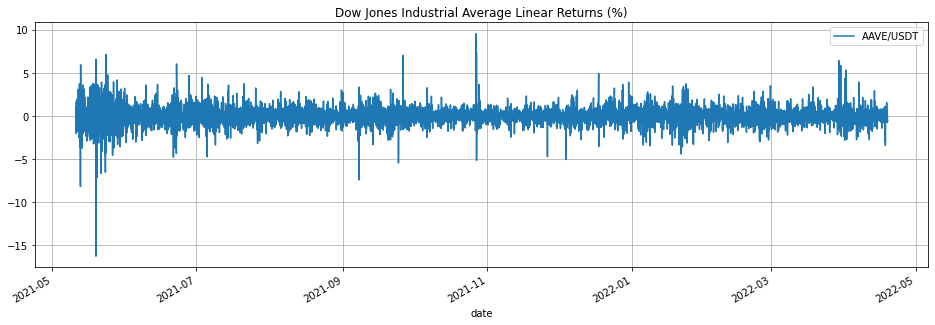

In [329]:
plt.figure(figsize=(16, 5))
plt.title("Dow Jones Industrial Average Linear Returns (%)")
data['AAVE/USDT'].plot()
plt.grid(True);
plt.legend()
plt.show()


In [332]:
stock_tickers = data.columns.values
n_tickers = len(stock_tickers)

In [333]:
percentage = int(len(data) * 0.9)
X_train = data[:percentage]
X_test = data[percentage:]

X_train_raw = data_raw[:percentage]
X_test_raw = data_raw[percentage:]

In [334]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(n_components=48)

In [335]:
pca_org = PCA(n_components=X_train.shape[1])
pca_org.fit(X_train)

PCA(n_components=48)

34 principal components explain 95.00% of variance


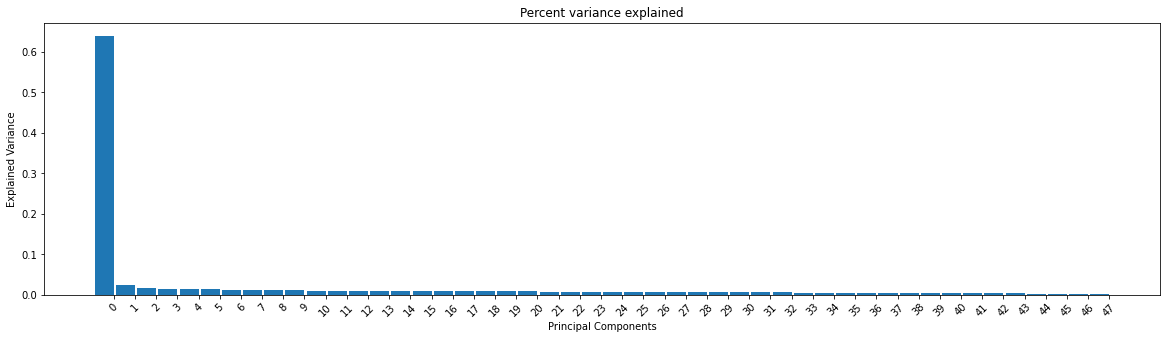

In [336]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
def plotPCA(pca, plot=False):

    # Visualizing Variance against number of principal components.
    #cov_matrix_raw = X_train_raw.loc[:,X_train_raw.columns != 'DJIA'].cov()

    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = stock_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

plotPCA(pca_org, plot=True)

In [337]:
# projected = pca.fit_transform(cov_matrix)
# pcs = pca.components_

In [338]:
pca_org = PCA(n_components=X_train.shape[1])
pca_org.fit(X_train)

PCA(n_components=48)

In [339]:
pca_org.feature_names_in_

array(['AAVE/USDT', 'ADA/USDT', 'ALGO/USDT', 'ATOM/USDT', 'AVAX/USDT',
       'AXS/USDT', 'BCH/USDT', 'BNB/USDT', 'BTC/USDT', 'CAKE/USDT',
       'CRV/USDT', 'DOGE/USDT', 'DOT/USDT', 'EGLD/USDT', 'ENJ/USDT',
       'EOS/USDT', 'ETC/USDT', 'ETH/USDT', 'FIL/USDT', 'FTM/USDT',
       'FTT/USDT', 'HBAR/USDT', 'HNT/USDT', 'KSM/USDT', 'LINK/USDT',
       'LRC/USDT', 'LTC/USDT', 'LUNA/USDT', 'MANA/USDT', 'MATIC/USDT',
       'MKR/USDT', 'NEAR/USDT', 'ONE/USDT', 'RUNE/USDT', 'SAND/USDT',
       'SHIB/USDT', 'SOL/USDT', 'STX/USDT', 'THETA/USDT', 'TRX/USDT',
       'UNI/USDT', 'VET/USDT', 'WAVES/USDT', 'XLM/USDT', 'XMR/USDT',
       'XRP/USDT', 'XTZ/USDT', 'ZEC/USDT'], dtype=object)

In [340]:
pc_components = pd.DataFrame(pca_org.components_ )
pc_components.columns = pca_org.feature_names_in_

pc_component_ptf_weights = pc_components/data_raw.std()

In [204]:
def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()

    return portfolio

Sum of weights of current eigen-portfolio: 0.11


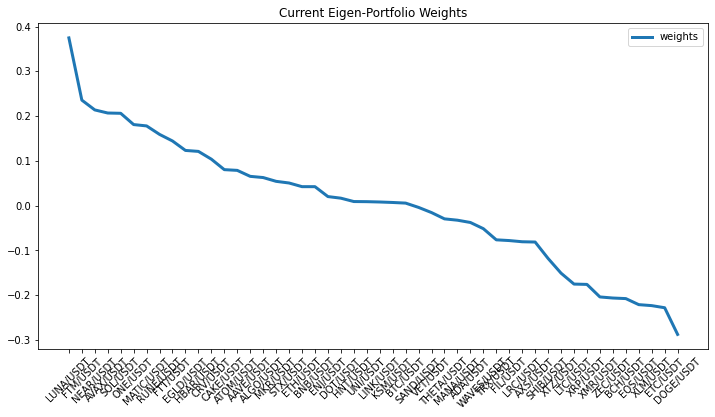

,weights
LUNA/USDT,0.374676
FTM/USDT,0.235677
NEAR/USDT,0.213795
AVAX/USDT,0.206874
SOL/USDT,0.206240
ONE/USDT,0.181055
MATIC/USDT,0.178049
RUNE/USDT,0.159113
FTT/USDT,0.144396
EGLD/USDT,0.123278


In [412]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100,5)

plotEigen(weights=pc_components.loc[2]*-1, plot=True)

In [355]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [356]:
eigen = pc_components.loc[0]*-1

In [359]:
def eigenreturn(return_df, eigen):
    eigen_portfolio_returns = np.dot(return_df.loc[:, eigen.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=return_df.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    #print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252
    df_plot = pd.DataFrame({'PC1': eigen_portfolio_returns, 'BTC/USDT': X_test_raw.loc[:, 'BTC/USDT']}, index=X_test.index)

    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)
    plt.show()

/var/folders/c1/_mpw_d1x7zl9q4td_m6xzl100000gn/T/ipykernel_41648/4056326463.py:9: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


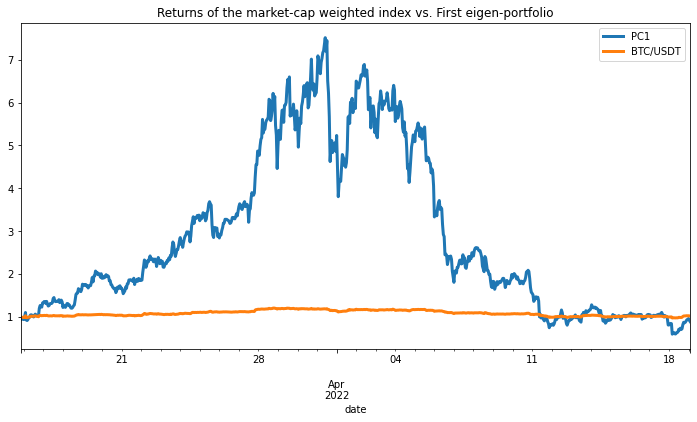

In [360]:
eigenreturn(data_raw, eigen)

Current Eigen-Portfolio:
Return = -3.45%
Volatility = 77.24%
Sharpe = -0.04


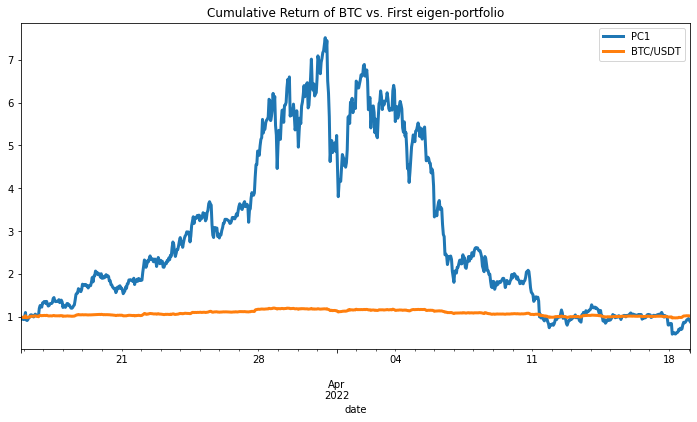

In [362]:
eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen.index], eigen)
eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=X_test_raw.index)
returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
df_plot = pd.DataFrame({'PC1': eigen_portfolio_returns, 'BTC/USDT': X_test_raw.loc[:, 'BTC/USDT']}, index=X_test.index)

np.cumprod(df_plot + 1).plot(title='Cumulative Return of BTC vs. First eigen-portfolio', 
                         figsize=(12,6), linewidth=3)
plt.show()

In [385]:
def eigenreturn(data_raw, eigen):
    eigen_portfolio_returns = np.dot(data_raw.loc[:, eigen.index], eigen/eigen.sum())

    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=data_raw.index)

    df_plot = pd.DataFrame({'PC1': eigen_portfolio_returns, 'BTC/USDT': data_raw.loc[:, 'BTC/USDT']}, index=data_raw.index)

    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. eigen-portfolio', 
                             figsize=(12,6), linewidth=3)
    plt.show()

In [413]:
eigen = pc_components.loc[0]*-1

In [405]:
eigen.sort_values()

DOGE/USDT    -0.287724
ETC/USDT     -0.228136
XLM/USDT     -0.223408
EOS/USDT     -0.221220
BCH/USDT     -0.207708
ZEC/USDT     -0.206429
XMR/USDT     -0.204028
XRP/USDT     -0.176011
LTC/USDT     -0.175278
XTZ/USDT     -0.150912
SHIB/USDT    -0.118047
AXS/USDT     -0.081345
LRC/USDT     -0.080726
FIL/USDT     -0.078076
TRX/USDT     -0.076429
WAVES/USDT   -0.051501
ADA/USDT     -0.037674
MANA/USDT    -0.032568
THETA/USDT   -0.029596
VET/USDT     -0.015553
SAND/USDT    -0.004015
BTC/USDT      0.005616
KSM/USDT      0.007019
LINK/USDT     0.008094
UNI/USDT      0.008834
HNT/USDT      0.009107
DOT/USDT      0.016614
ENJ/USDT      0.020192
BNB/USDT      0.042328
ETH/USDT      0.042365
STX/USDT      0.050530
MKR/USDT      0.054232
ALGO/USDT     0.062702
AAVE/USDT     0.065381
ATOM/USDT     0.078730
CAKE/USDT     0.080372
CRV/USDT      0.103764
HBAR/USDT     0.121127
EGLD/USDT     0.123278
FTT/USDT      0.144396
RUNE/USDT     0.159113
MATIC/USDT    0.178049
ONE/USDT      0.181055
SOL/USDT   

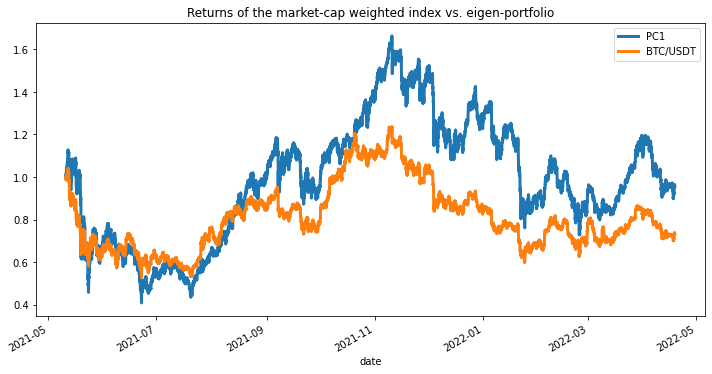

In [414]:
eigenreturn(data_raw, eigen)

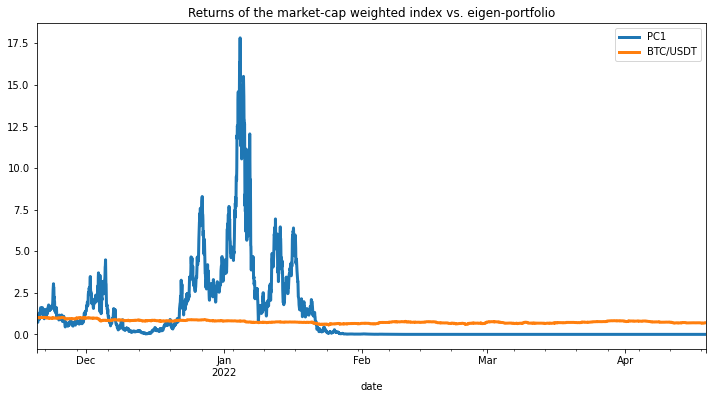

In [401]:
eigenreturn(data_raw.loc[datetime(2021,11,20):], eigen)

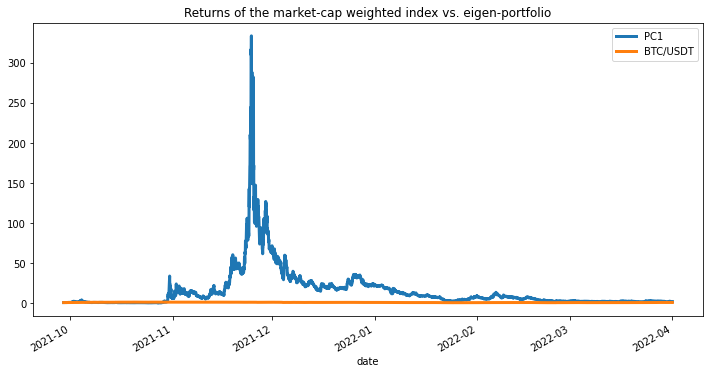

In [390]:
eigenreturn(data_raw.loc[datetime(2021,9,29):datetime(2022,4,1)], eigen)

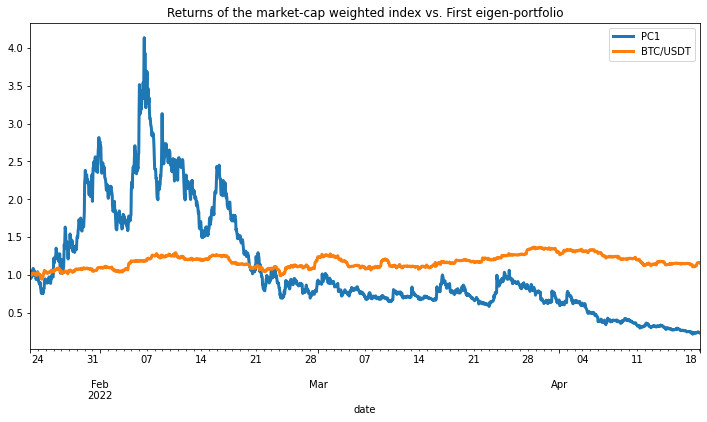

In [375]:
eigenreturn(data_raw.loc[datetime(2022,1,23):], eigen)

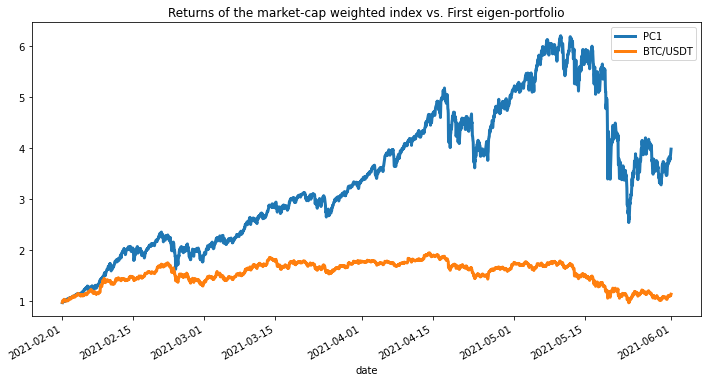

In [279]:
eigenreturn(data_raw.loc[datetime(2021,2,1):datetime(2021,6,1)], eigen)

In [ ]:
eigenreturn(data_raw.loc[datetime(2021,2,1):datetime(2021,6,1)], eigen)

In [259]:
data_raw.loc[datetime(2021,1,1):datetime(2021,5,1)]

pair,AAVE/USDT,ADA/USDT,ALGO/USDT,ATOM/USDT,AVAX/USDT,AXS/USDT,BCH/USDT,BNB/USDT,BTC/USDT,DOGE/USDT,...,THETA/USDT,TRX/USDT,UNI/USDT,VET/USDT,WAVES/USDT,XLM/USDT,XMR/USDT,XRP/USDT,XTZ/USDT,ZEC/USDT
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,-0.007662,0.017007,-0.003757,-0.012967,-0.023166,-0.001403,0.024221,0.006341,0.014308,0.012332,...,-0.006612,0.014552,-0.011064,0.029473,-0.007344,0.032999,0.019692,0.009927,0.028296,0.015323
2021-01-01 02:00:00,0.005262,0.000545,0.027560,0.009497,-0.025797,-0.000843,0.013325,0.009215,-0.007322,0.003927,...,0.033776,0.003310,0.003542,-0.000656,-0.003162,-0.002405,0.008187,-0.000938,0.010823,0.001067
2021-01-01 03:00:00,0.006509,-0.004138,0.013834,-0.030260,0.006280,0.015979,-0.009651,-0.000922,0.002869,0.046897,...,0.030403,-0.004399,-0.005748,-0.009246,-0.006955,-0.014165,-0.009732,0.016502,-0.004993,-0.004721
2021-01-01 04:00:00,-0.011565,-0.006123,-0.018379,-0.015845,-0.005919,-0.004818,-0.007807,-0.001445,-0.001984,-0.016934,...,-0.016816,-0.004050,-0.008342,0.005559,-0.001184,0.019566,0.000814,0.051386,-0.017661,-0.000765
2021-01-01 05:00:00,0.020576,0.006436,0.020142,-0.003614,-0.002492,-0.004211,-0.000086,-0.004154,-0.001140,0.009829,...,-0.002096,-0.001109,0.000822,-0.002739,-0.005210,0.000300,0.001001,-0.003306,0.000639,-0.005206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 20:00:00,0.012579,-0.008693,0.001011,-0.013131,-0.007438,0.009644,0.002512,-0.006616,-0.004386,0.014009,...,0.005627,-0.000382,-0.005216,-0.012451,-0.002459,-0.007719,-0.003710,-0.010114,-0.003914,-0.000832
2021-04-30 21:00:00,-0.021047,0.001635,-0.001659,0.002670,0.009804,0.020058,0.000515,-0.001737,0.003862,0.006360,...,0.002798,-0.001377,-0.007742,-0.005233,-0.011219,0.001864,0.002200,0.007933,0.002009,-0.001956
2021-04-30 22:00:00,0.001027,-0.001484,0.006647,-0.000178,0.013326,-0.000128,-0.002040,-0.002611,0.002514,0.008164,...,0.006030,0.001762,0.005584,0.006463,-0.000988,-0.001462,0.008540,-0.007871,-0.001146,0.014259


In [255]:
data_raw

pair,AAVE/USDT,ADA/USDT,ALGO/USDT,ATOM/USDT,AVAX/USDT,AXS/USDT,BCH/USDT,BNB/USDT,BTC/USDT,DOGE/USDT,...,THETA/USDT,TRX/USDT,UNI/USDT,VET/USDT,WAVES/USDT,XLM/USDT,XMR/USDT,XRP/USDT,XTZ/USDT,ZEC/USDT
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,-0.007662,0.017007,-0.003757,-0.012967,-0.023166,-0.001403,0.024221,0.006341,0.014308,0.012332,...,-0.006612,0.014552,-0.011064,0.029473,-0.007344,0.032999,0.019692,0.009927,0.028296,0.015323
2021-01-01 02:00:00,0.005262,0.000545,0.027560,0.009497,-0.025797,-0.000843,0.013325,0.009215,-0.007322,0.003927,...,0.033776,0.003310,0.003542,-0.000656,-0.003162,-0.002405,0.008187,-0.000938,0.010823,0.001067
2021-01-01 03:00:00,0.006509,-0.004138,0.013834,-0.030260,0.006280,0.015979,-0.009651,-0.000922,0.002869,0.046897,...,0.030403,-0.004399,-0.005748,-0.009246,-0.006955,-0.014165,-0.009732,0.016502,-0.004993,-0.004721
2021-01-01 04:00:00,-0.011565,-0.006123,-0.018379,-0.015845,-0.005919,-0.004818,-0.007807,-0.001445,-0.001984,-0.016934,...,-0.016816,-0.004050,-0.008342,0.005559,-0.001184,0.019566,0.000814,0.051386,-0.017661,-0.000765
2021-01-01 05:00:00,0.020576,0.006436,0.020142,-0.003614,-0.002492,-0.004211,-0.000086,-0.004154,-0.001140,0.009829,...,-0.002096,-0.001109,0.000822,-0.002739,-0.005210,0.000300,0.001001,-0.003306,0.000639,-0.005206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 20:00:00,0.007850,-0.001076,-0.000817,0.000422,0.008254,-0.001091,-0.001778,-0.001204,-0.000404,0.003615,...,-0.002667,0.001144,-0.001080,-0.005772,-0.005517,0.014314,-0.007053,-0.000659,0.005722,0.015242
2022-04-18 21:00:00,0.004793,0.004310,0.003409,0.005902,0.006627,0.007864,0.008017,0.005305,0.003370,0.007205,...,0.007353,0.002613,0.006486,0.009390,0.014624,-0.005839,0.001973,0.005015,0.000948,0.010444
2022-04-18 22:00:00,0.004174,0.002146,-0.000136,0.001257,0.003227,0.001300,-0.001767,0.002159,0.003001,0.002146,...,0.001659,0.002117,0.007519,0.005413,-0.000994,0.004405,0.040567,0.006040,0.005368,0.001938


In [247]:

returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)

/var/folders/c1/_mpw_d1x7zl9q4td_m6xzl100000gn/T/ipykernel_41648/4056326463.py:9: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


Current Eigen-Portfolio:
Return = nan%
Volatility = 122.18%
Sharpe = nan


/var/folders/c1/_mpw_d1x7zl9q4td_m6xzl100000gn/T/ipykernel_41648/4056326463.py:9: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


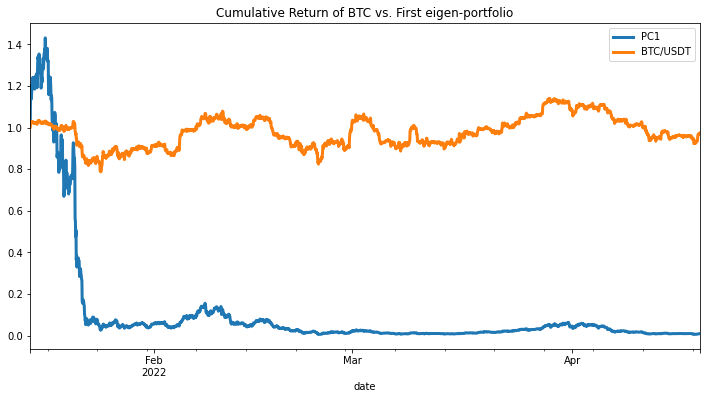

In [251]:

returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252
df_plot = pd.DataFrame({'PC1': eigen_portfolio_returns, 'BTC/USDT': X_test_raw.loc[:, 'BTC/USDT']}, index=X_test.index)

np.cumprod(df_plot + 1).plot(title='Cumulative Return of BTC vs. First eigen-portfolio', 
                         figsize=(12,6), linewidth=3)
plt.show()

Current Eigen-Portfolio:
Return = -6.09%
Volatility = 38.31%
Sharpe = -0.16


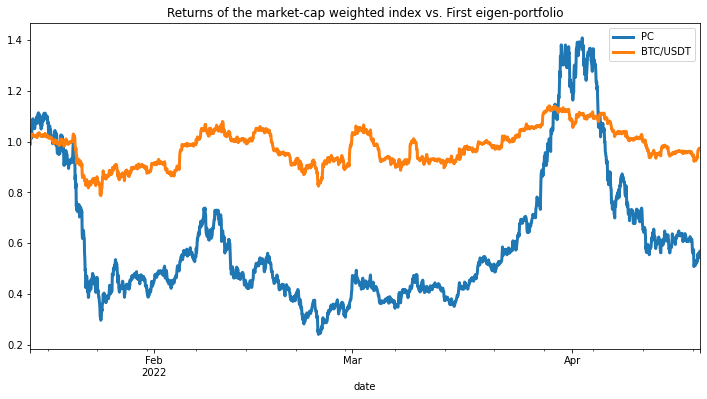

In [145]:
def plotSharpe(eigen):

    '''
    Plots Principle components returns against real returns.
    
    '''

    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen.index], eigen / len(pcs))
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=X_test.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC': eigen_portfolio_returns, 'BTC/USDT': X_test_raw.loc[:, 'BTC/USDT']}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)
    plt.show()

plotSharpe(eigen=plotEigen(weights=weights[0]))

In [ ]:
def plotSharpeCustom(eigen):

    '''
    Plots Principle components returns against real returns.
    
    '''

    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen.index], eigen / len(pcs))
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=X_test.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC': eigen_portfolio_returns, 'BTC/USDT': X_test_raw.loc[:, 'BTC/USDT']}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)
    plt.show()

plotSharpe(eigen=plotEigen(weights=weights[4]))

In [137]:
plotEigen(weights=weights[5]).index

Index(['HNT/USDT', 'FIL/USDT', 'ADA/USDT', 'AXS/USDT', 'ETC/USDT', 'ETH/USDT',
       'FTM/USDT', 'MANA/USDT', 'LUNA/USDT', 'NEAR/USDT', 'ZEC/USDT',
       'SAND/USDT', 'LTC/USDT', 'BTC/USDT', 'LINK/USDT', 'AAVE/USDT',
       'VET/USDT', 'XRP/USDT', 'RUNE/USDT', 'ONE/USDT', 'XTZ/USDT', 'BNB/USDT',
       'WAVES/USDT', 'UNI/USDT', 'THETA/USDT', 'STX/USDT', 'XMR/USDT',
       'ALGO/USDT', 'TRX/USDT', 'DOT/USDT', 'SOL/USDT', 'HBAR/USDT',
       'DOGE/USDT', 'XLM/USDT', 'MATIC/USDT', 'ENJ/USDT', 'EGLD/USDT',
       'BCH/USDT', 'EOS/USDT', 'FTT/USDT', 'AVAX/USDT', 'ATOM/USDT'],
      dtype='object')

In [142]:
def optimizedPortfolio():
    n_portfolios = len(pcs)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 

    for i in range(n_portfolios):
        
        pc_w = pcs[:, i] / sum(pcs[:, i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen_prtfi / n_portfolios)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(10))

    plt.show()

Eigen portfolio #39 with the highest Sharpe. Return 13.13%, vol = 91.59%, Sharpe = 0.14
      Return       Vol    Sharpe
39  0.131268  0.915922  0.143318
4   0.043790  0.415118  0.105489
27  0.021595  0.310235  0.069607
24 -0.001660  0.448909 -0.003699
32 -0.032571  0.417655 -0.077986
15 -0.048730  0.378118 -0.128876
17 -0.057587  0.446481 -0.128979
13 -0.126771  0.963086 -0.131630
10 -0.072649  0.518187 -0.140199
34 -0.101959  0.645117 -0.158047


/var/folders/c1/_mpw_d1x7zl9q4td_m6xzl100000gn/T/ipykernel_41648/4056326463.py:9: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1


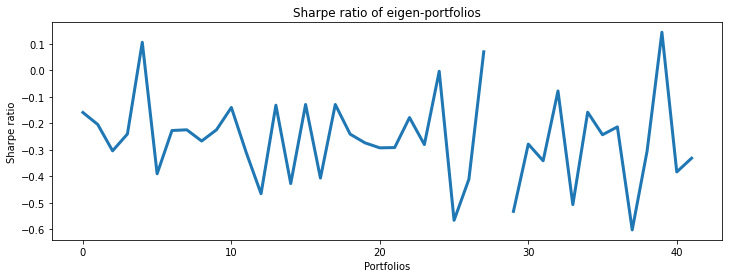

In [143]:
optimizedPortfolio()